In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
lagos = gpd.read_file("data/raw/Lagos_boundary.shp")
lagos.plot(figsize=(6,6), edgecolor='black', color='lightblue')
plt.title("Lagos State Boundary", fontsize=14)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

DataSourceError: data/raw/Lagos_boundary.shp: No such file or directory

In [1]:
import os
import matplotlib.pyplot as plt
from rasterio.plot import show

In [2]:
import rasterio
import matplotlib.pyplot as plt
# Path to clipped DEM
dem_path = "data/processed/Lagos_DEM.tif"
# Read DEM
with rasterio.open(dem_path) as src:
    dem = src.read(1)  # first band
    profile = src.profile
# Plot DEM
plt.figure(figsize=(8,6))
plt.imshow(dem, cmap='terrain')
plt.colorbar(label='Elevation (meters)')
plt.title("Clipped DEM - Lagos State")
plt.xlabel("Column")
plt.ylabel("Row")
plt.show()
# Check statistics
print("Min elevation:", dem.min())
print("Max elevation:", dem.max())
print("Mean elevation:", dem.mean())

RasterioIOError: data/processed/Lagos_DEM.tif: No such file or directory

Current working directory: c:\Users\user\Desktop\flood_risk_analysis


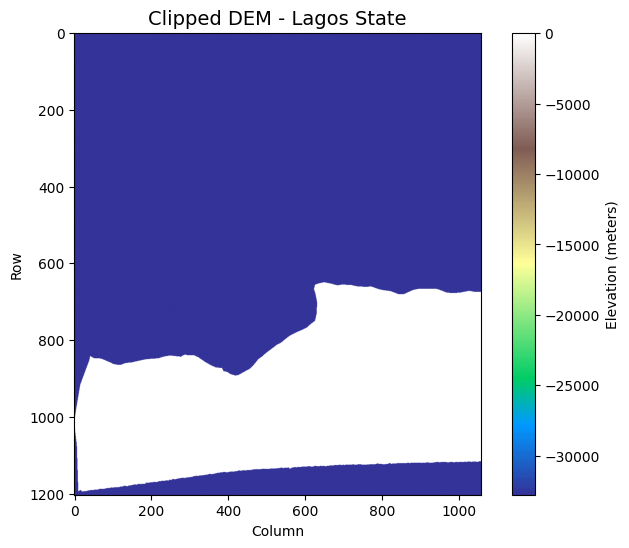

Min elevation: -32768
Max elevation: 29
Mean elevation: -22754.24395847181


In [3]:
import os
import rasterio
import matplotlib.pyplot as plt
# Ensure working directory is project root (move up from 'notebooks' folder)
os.chdir("..")
print("Current working directory:", os.getcwd())
# Path to clipped DEM
dem_path = "data/processed/Lagos_DEM.tif"
# Read DEM
with rasterio.open(dem_path) as src:
    dem = src.read(1)  # first band
    profile = src.profile
# Plot DEM
plt.figure(figsize=(8,6))
plt.imshow(dem, cmap='terrain')
plt.colorbar(label='Elevation (meters)')
plt.title("Clipped DEM - Lagos State", fontsize=14)
plt.xlabel("Column")
plt.ylabel("Row")
plt.show()
# Check DEM statistics
print("Min elevation:", dem.min())
print("Max elevation:", dem.max())
print("Mean elevation:", dem.mean())

In [4]:
import numpy as np
import rasterio
# Paths
input_dem_path = "data/processed/Lagos_DEM.tif"
output_norm_path = "data/processed/Lagos_DEM_normalized.tif"
# Open DEM and read values
with rasterio.open(input_dem_path) as src:
    dem = src.read(1).astype(float)  # Convert to float for normalization
    profile = src.profile
# Calculate min and max (ignore no-data)
valid_pixels = dem[dem > 0]  # exclude zero or negative if needed
min_val = valid_pixels.min()
max_val = valid_pixels.max()
# Normalize: (value - min) / (max - min)
dem_normalized = (dem - min_val) / (max_val - min_val)
# Replace negative/invalid values with 0
dem_normalized[dem_normalized < 0] = 0
# Update profile for output
profile.update(dtype=rasterio.float32)
# Save normalized DEM
with rasterio.open(output_norm_path, 'w', **profile) as dst:
    dst.write(dem_normalized.astype(rasterio.float32), 1)
print(f"Normalized DEM saved at {output_norm_path}")
print(f"Original min: {min_val}, max: {max_val}")
print("Normalized range:", dem_normalized.min(), "to", dem_normalized.max())

Normalized DEM saved at data/processed/Lagos_DEM_normalized.tif
Original min: 1.0, max: 29.0
Normalized range: 0.0 to 1.0


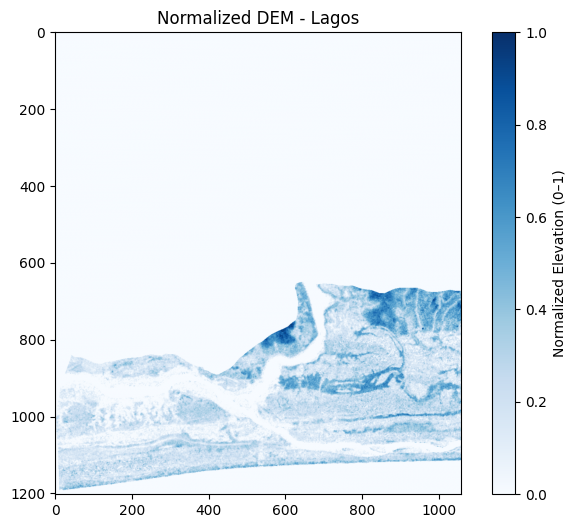

In [5]:
plt.figure(figsize=(8,6))
plt.imshow(dem_normalized, cmap='Blues')  # flood risk color style
plt.colorbar(label='Normalized Elevation (0–1)')
plt.title("Normalized DEM - Lagos")
plt.show()

In [ ]:
import numpy as np
import rasterio
# Paths
input_rainfall_path = "data/processed/Lagos_rainfall.tif"
output_rainfall_norm_path = "data/processed/Lagos_rainfall_normalized.tif"
# Open rainfall raster
with rasterio.open(input_rainfall_path) as src:
    rainfall = src.read(1).astype(float)  # convert to float
    profile = src.profile
# Calculate min and max (ignore zeros if needed)
valid_pixels = rainfall[rainfall > 0]  # avoid zero or nodata
min_val = valid_pixels.min()
max_val = valid_pixels.max()
# Normalize
rainfall_normalized = (rainfall - min_val) / (max_val - min_val)
rainfall_normalized[rainfall_normalized < 0] = 0  # remove negatives
# Update profile
profile.update(dtype=rasterio.float32)
# Save normalized raster
with rasterio.open(output_rainfall_norm_path, 'w', **profile) as dst:
    dst.write(rainfall_normalized.astype(rasterio.float32), 1)
print(f"Normalized rainfall saved at {output_rainfall_norm_path}")
print(f"Original min: {min_val}, max: {max_val}")
print("Normalized range:", rainfall_normalized.min(), "to", rainfall_normalized.max())

: 

In [3]:
# DEM Slope & Flow
%run ../scripts/compute_slope_flow.py
# NDVI Processing
%run ../scripts/compute_ndvi.py
# Normalization for NDVI, Slope, Flow Accumulation
%run ../scripts/normalize_rasters.py

RasterioIOError: data/raw/Lagos_DEM.tif: No such file or directory

RasterioIOError: data/raw\ndvi_lagos.tif: No such file or directory

⚠ Skipped: data/processed\ndvi_lagos.tif not found.
⚠ Skipped: data/processed\slope.tif not found.
⚠ Skipped: data/processed\flow_accumulation.tif not found.


In [4]:
# Standard imports
import os
import rasterio
import numpy as np
import matplotlib.pyplot as plt
# Ensure working directory is project root
os.chdir("..")  # run from notebooks folder
print("Current working directory:", os.getcwd())

Current working directory: c:\Users\user\Desktop\flood_risk_analysis


In [7]:
%run ../scripts/compute_ndvi.py

Exception: File `'../scripts/compute_ndvi.py'` not found.